In [145]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')
df = pd.read_csv('gender_submission.csv')

In [235]:
combined = pd.concat([train, test], sort=True)
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [236]:
combined.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [237]:
combined[combined.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [238]:
combined.Embarked.mode()

0    S
dtype: object

In [239]:
combined.Embarked.fillna('S', inplace=True)

In [240]:
combined.Embarked.isnull().sum()

0

In [241]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

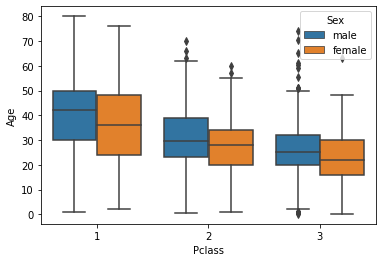

In [242]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=combined[~combined.Age.isnull()])

In [243]:
combined[(combined.Pclass==3) & (combined.Sex=='female')].Age.median()

22.0

In [244]:
age_medians = {'1': 
                   {'male': combined[(combined.Pclass==1) & (combined.Sex=='male')].Age.median(), 
                    'female': combined[(combined.Pclass==1) & (combined.Sex=='female')].Age.median()},
               '2':
                   {'male': combined[(combined.Pclass==2) & (combined.Sex=='male')].Age.median(),
                    'female': combined[(combined.Pclass==2) & (combined.Sex=='female')].Age.median()},
               '3':
                   {'male': combined[(combined.Pclass==3) & (combined.Sex=='male')].Age.median(), 
                    'female':combined[(combined.Pclass==3) & (combined.Sex=='female')].Age.median()}
              }

age_medians

{'1': {'male': 42.0, 'female': 36.0},
 '2': {'male': 29.5, 'female': 28.0},
 '3': {'male': 25.0, 'female': 22.0}}

In [245]:
age_medians['1']['male']

42.0

In [246]:
def fill_age(sample):
    pclass = str(sample.Pclass)
    age = sample.Age
    sex = sample.Sex
    if pd.isnull(age):
        return age_medians[pclass][sex]
    else:
        return age
            

combined['Age'] = combined.apply(fill_age, axis=1)

In [247]:
combined.isnull().sum()

Age            0
Cabin       1014
Embarked       0
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [248]:
combined[combined.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [249]:
# find mean fare of male in 3 class
df_class_3 = combined[combined.Pclass==3]
class_3_male_mean = df_class_3[df_class_3.Sex=='male'].Fare.mean()

//anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

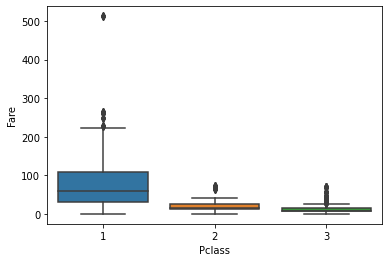

In [250]:
sns.boxplot('Pclass', 'Fare', data=combined)

In [251]:
combined.Fare.fillna(class_3_male_mean, inplace=True)

In [252]:
combined.isnull().sum()

Age            0
Cabin       1014
Embarked       0
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [253]:
combined.Sex = combined.Sex.map({'male':1, 'female':'0'})

In [254]:
combined

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,1,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,1,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...
1305,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,1,0,NaN,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,0,0,NaN,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,1,0,NaN,SOTON/O.Q. 3101262


In [255]:
combined.nunique()

Age           99
Cabin        186
Embarked       3
Fare         282
Name        1307
Parch          8
Pclass         3
Sex            2
SibSp          7
Survived       2
Ticket       929
dtype: int64

In [256]:
cat_features = ['Pclass', 'Embarked']
combined = pd.get_dummies(combined, prefix=cat_features, columns=cat_features)
combined

,Age,Cabin,Fare,Name,Parch,Sex,SibSp,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,1,0.0,A/5 21171,0,0,1,0,0,1
2,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,1.0,PC 17599,1,0,0,1,0,0
3,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,0,0,1.0,STON/O2. 3101282,0,0,1,0,0,1
4,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1,1.0,113803,1,0,0,0,0,1
5,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,1,0,0.0,373450,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,25.0,NaN,8.0500,"Spector, Mr. Woolf",0,1,0,NaN,A.5. 3236,0,0,1,0,0,1
1306,39.0,C105,108.9000,"Oliva y Ocana, Dona. Fermina",0,0,0,NaN,PC 17758,1,0,0,1,0,0
1307,38.5,NaN,7.2500,"Saether, Mr. Simon Sivertsen",0,1,0,NaN,SOTON/O.Q. 3101262,0,0,1,0,0,1


In [257]:
train.shape, test.shape

((891, 11), (418, 10))

In [265]:
X = combined[:891].drop(['Cabin', 'Name', 'Ticket', 'Survived'], axis=1)
y = combined.Survived[:891]

In [266]:
X.head()

,Age,Fare,Parch,Sex,SibSp,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,22.0,7.2500,0,1,1,0,0,1,0,0,1
2,38.0,71.2833,0,0,1,1,0,0,1,0,0
3,26.0,7.9250,0,0,0,0,0,1,0,0,1
4,35.0,53.1000,0,0,1,1,0,0,0,0,1
5,35.0,8.0500,0,1,0,0,0,1,0,0,1


In [267]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [268]:
model.coef_

array([-6.26701503e-03,  3.07735030e-04, -1.59499012e-02, -4.98333242e-01,
       -4.31952102e-02,  1.74607860e-01,  1.25697791e-02, -1.87177639e-01,
        2.55576187e-02,  1.23533215e-02, -3.79109401e-02])

In [287]:
X_test = combined[891:].drop(['Cabin', 'Name', 'Ticket', 'Survived'], axis=1)
y_test = df.Survived

In [288]:
X_test.head()

,Age,Fare,Parch,Sex,SibSp,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
892,34.5,7.8292,0,1,0,0,0,1,0,1,0
893,47.0,7.0000,0,0,1,0,0,1,0,0,1
894,62.0,9.6875,0,1,0,0,1,0,0,1,0
895,27.0,8.6625,0,1,0,0,0,1,0,0,1
896,22.0,12.2875,1,0,1,0,0,1,0,0,1


In [289]:
model.score(X_test, y_test)

0.6781419880146577